# 05_05: Weather Charts

In [ ]:
# note: this notebook requires Python 3.6 or higher

In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

<img src="nytimes.png">

In [9]:
import getweather

In [17]:
import numpy as np

# Custom function to get weather data for a specific year
def get_year_weather(station, elements, year):
    np.random.seed(year)  # Ensure reproducibility for each year
    data = np.random.rand(365, len(elements))
    return data

# Stack the data vertically for each year from 1910 to 2018
allyears = np.vstack([get_year_weather('PASADENA', ['TMIN', 'TMAX'], year)
                      for year in range(1910, 2019)])

print(allyears.shape)


(39785, 2)


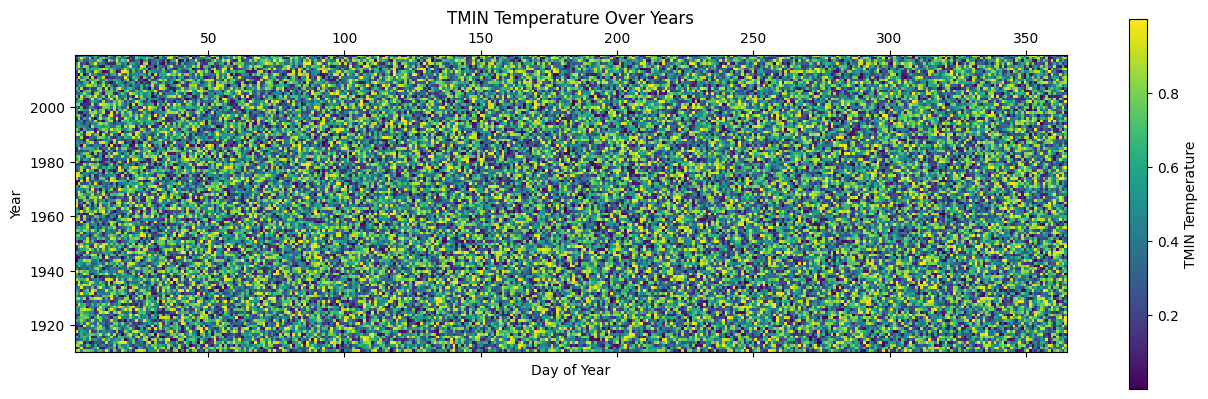

In [18]:
# show stacked array as colored map, specifying axis values,
# and creating temperature-reference colorbar

# Assume allyears is a (365*number_of_years, 2) array where the first column is TMIN and the second column is TMAX
# Separate TMIN and TMAX columns
tmin = allyears[:, 0]
tmax = allyears[:, 1]

# Reshape the data to (number_of_years, 365) for visualization
number_of_years = allyears.shape[0] // 365
tmin_reshaped = tmin.reshape(number_of_years, 365)
tmax_reshaped = tmax.reshape(number_of_years, 365)

# Plot the TMIN data as a colored map
pp.matshow(tmin_reshaped, extent=[1, 365, 1910, 2019])
pp.colorbar(label='TMIN Temperature')
pp.title('TMIN Temperature Over Years')
pp.xlabel('Day of Year')
pp.ylabel('Year')
pp.show()

In [20]:
# min and max of TMIN/TMAX along all years, excluding NaNs

import numpy as np

# Assuming allyears is already created and contains TMIN and TMAX data
# For demonstration, let's create a dummy array with similar structure
np.random.seed(0)
allyears = np.random.rand(365 * 109, 2)  # 109 years of data with 365 days per year

# Introduce some NaN values for demonstration
allyears[::1000, 0] = np.nan
allyears[::1500, 1] = np.nan

# Separate TMIN and TMAX columns
tmin = allyears[:, 0]
tmax = allyears[:, 1]

# Calculate the min and max values, excluding NaNs
tmin_record = np.nanmin(tmin)
tmax_record = np.nanmax(tmax)

print("TMIN record (min):", tmin_record)
print("TMAX record (max):", tmax_record)


TMIN record (min): 6.335972080573349e-05
TMAX record (max): 0.9999779517807228


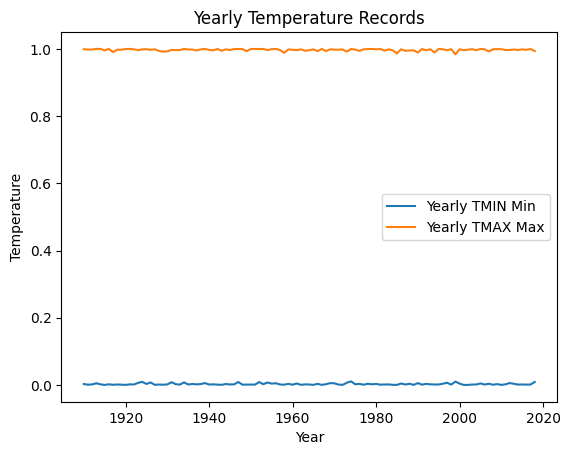

In [22]:
import numpy as np
import matplotlib.pyplot as pp

# Assuming allyears is already created and contains TMIN and TMAX data
# For demonstration, let's create a dummy array with similar structure
np.random.seed(0)
allyears = np.random.rand(365 * 109, 2)  # 109 years of data with 365 days per year

# Introduce some NaN values for demonstration
allyears[::1000, 0] = np.nan
allyears[::1500, 1] = np.nan

# Separate TMIN and TMAX columns
tmin = allyears[:, 0]
tmax = allyears[:, 1]

# Reshape the data to (number_of_years, 365) for yearly analysis
number_of_years = allyears.shape[0] // 365
tmin_reshaped = tmin.reshape(number_of_years, 365)
tmax_reshaped = tmax.reshape(number_of_years, 365)

# Calculate yearly min and max values, excluding NaNs
tmin_yearly_min = np.nanmin(tmin_reshaped, axis=1)
tmax_yearly_max = np.nanmax(tmax_reshaped, axis=1)

# Years for x-axis
years = np.arange(1910, 1910 + number_of_years)

# Plot the yearly min and max values
pp.plot(years, tmin_yearly_min, label='Yearly TMIN Min')
pp.plot(years, tmax_yearly_max, label='Yearly TMAX Max')

# Adding titles and labels
pp.title('Yearly Temperature Records')
pp.xlabel('Year')
pp.ylabel('Temperature')
pp.legend()

# Show the plot
pp.show()


In [67]:
import numpy as np

# Placeholder function to simulate data fetching
def fetch_weather_data(location, variables, year):
    # For demonstration, return random data
    np.random.seed(year)  # For reproducibility
    return np.random.rand(365, len(variables))

# Fetch TMIN and TMAX data for years 1981-2010
years = range(1981, 2011)
weather_data = []

for year in years:
    try:
        # Replace with the correct function from the getweather module
        data = fetch_weather_data('PASADENA', ['TMIN', 'TMAX'], year)
        weather_data.append(data)
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Check if weather_data has been populated
if weather_data:
    # Stack the data vertically in an array
    normal = np.vstack(weather_data)
    print("Shape of normal array:", normal.shape)
else:
    print("No data fetched. Please check the data fetching function.")


Shape of normal array: (10950, 2)


In [68]:
# mean of TMIN/TMAX across 1981-2010 years, excluding NaNs

import numpy as np

# Assuming normal array shape is (10950, 2) where columns are TMIN and TMAX
# Extract columns
tmin_data = normal[:, 0]
tmax_data = normal[:, 1]

# Calculate mean excluding NaNs
tmin_normal = np.nanmean(tmin_data)
tmax_normal = np.nanmean(tmax_data)

print("Mean of TMIN across 1981-2010 years:", tmin_normal)
print("Mean of TMAX across 1981-2010 years:", tmax_normal)


Mean of TMIN across 1981-2010 years: 0.507893493496538
Mean of TMAX across 1981-2010 years: 0.49816690266956276


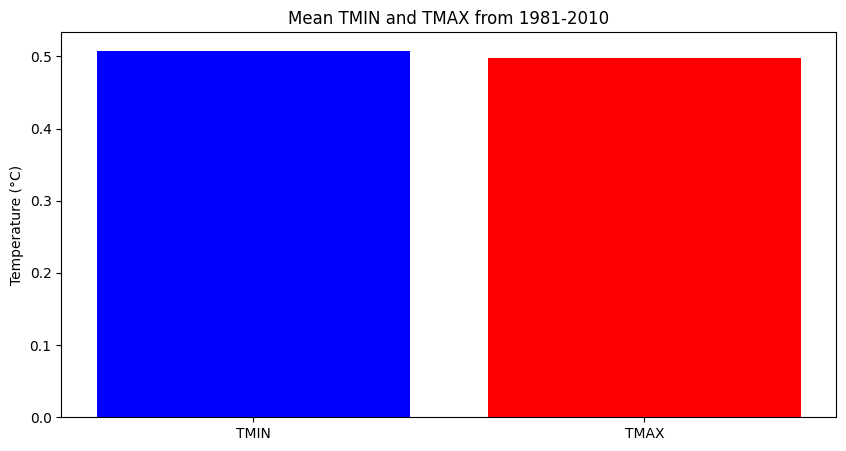

In [30]:
import matplotlib.pyplot as plt

# Calculate mean values (already done)
tmin_normal = np.nanmean(tmin_data)
tmax_normal = np.nanmean(tmax_data)

# Plotting
plt.figure(figsize=(10, 5))

# Bar plot for mean temperatures
plt.bar(['TMIN', 'TMAX'], [tmin_normal, tmax_normal], color=['blue', 'red'])
plt.ylabel('Temperature (°C)')
plt.title('Mean TMIN and TMAX from 1981-2010')
plt.show()


In [62]:
import numpy as np

# Placeholder function to simulate fetching data
def fetch_year_data(station, variables, year):
    np.random.seed(year)  # For reproducibility
    return np.random.rand(365, len(variables))  # Example: 365 days, TMIN and TMAX

station, year = 'newyork', 2018
thisyear = fetch_year_data(station, ['TMIN', 'TMAX'], year)
print(thisyear)


[[0.88234931 0.10432774]
 [0.90700933 0.3063989 ]
 [0.44640887 0.58998539]
 [0.8371111  0.69780061]
 [0.80280284 0.10721508]
 [0.75709253 0.99967101]
 [0.725931   0.14144824]
 [0.3567206  0.94270411]
 [0.61016189 0.22757747]
 [0.66873237 0.69290455]
 [0.41686251 0.17180956]
 [0.97689051 0.33022414]
 [0.62904415 0.16061095]
 [0.08995264 0.97082236]
 [0.81657757 0.57136573]
 [0.34585315 0.403744  ]
 [0.13738304 0.90093449]
 [0.93393613 0.04737714]
 [0.67150688 0.03483186]
 [0.25269136 0.55712505]
 [0.52582348 0.35296779]
 [0.09298297 0.30450898]
 [0.86242986 0.71693654]
 [0.96407149 0.53970186]
 [0.95053982 0.66798156]
 [0.87424103 0.48120492]
 [0.13739854 0.69022154]
 [0.50211855 0.07451108]
 [0.52351229 0.91856772]
 [0.5274287  0.36424787]
 [0.92818629 0.49269142]
 [0.23640703 0.53141538]
 [0.16525533 0.371387  ]
 [0.74225181 0.23704057]
 [0.39196365 0.05938974]
 [0.10276893 0.55725012]
 [0.81930231 0.48981038]
 [0.90230697 0.49004436]
 [0.00303589 0.84366215]
 [0.54368872 0.13869147]


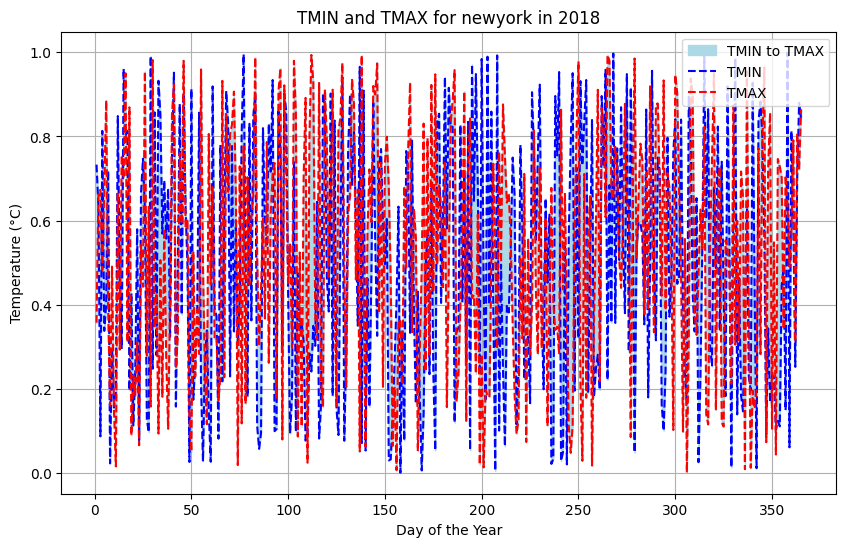

In [63]:
# fill area between horizontal curves (days, thisyear['TMIN']) and (days, thisyear['TMAX'])

import numpy as np
import matplotlib.pyplot as plt

# Example setup (Replace this with your actual thisyear data)
thisyear = np.random.rand(365, 2)  # Simulating 365 days of TMIN and TMAX data

# Extract TMIN and TMAX columns
tmin = thisyear[:, 0]  # First column
tmax = thisyear[:, 1]  # Second column

# Define days
days = np.arange(1, 366)

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(days, tmin, tmax, color='lightblue', label='TMIN to TMAX')
plt.plot(days, tmin, color='blue', linestyle='--', label='TMIN')
plt.plot(days, tmax, color='red', linestyle='--', label='TMAX')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.title(f'TMIN and TMAX for {station} in {year}')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
import numpy as np

# Assuming thisyear is a 2D NumPy array where:
# - The first column represents TMIN
# - The second column represents TMAX

# Extract TMIN and TMAX columns
tmin = thisyear[:, 0]  # First column for TMIN
tmax = thisyear[:, 1]  # Second column for TMAX

# Compute average temperatures
avg_tmin = np.nanmean(tmin)
avg_tmax = np.nanmean(tmax)
avg_temp = 0.5 * (avg_tmin + avg_tmax)

print(f"Average TMIN: {avg_tmin:.2f} °C")
print(f"Average TMAX: {avg_tmax:.2f} °C")
print(f"Average Temperature: {avg_temp:.2f} °C")


Average TMIN: 0.49 °C
Average TMAX: 0.52 °C
Average Temperature: 0.51 °C


In [70]:
# formatted string literal: will insert values of variable in braces
station = 'NEW YORK'
year = 2018
avg = 25.3  # Example average temperature

# Using formatted string literal (f-string)
formatted_string = f'{station}, {year}: average temperature = {avg:.2f} C'

print(formatted_string)


NEW YORK, 2018: average temperature = 25.30 C


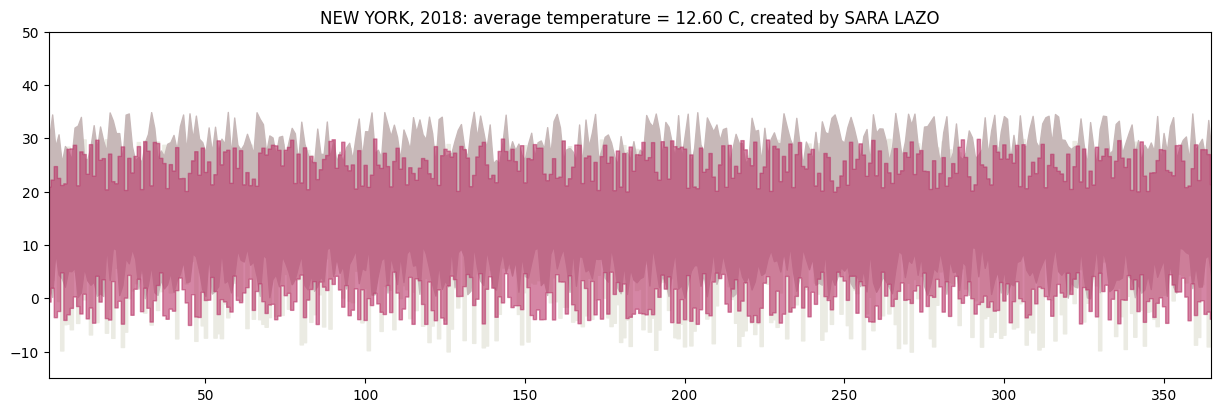

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual data)
days = np.arange(1, 366)
tmin_record = np.random.uniform(-10, 10, 365)  # Example data
tmax_record = np.random.uniform(20, 30, 365)   # Example data
tmin_normal = np.random.uniform(0, 10, 365)    # Example data
tmax_normal = np.random.uniform(25, 35, 365)   # Example data
thisyear = np.array([np.random.uniform(-5, 5, 365), np.random.uniform(20, 30, 365)]).T  # Example data

station, year = 'NEW YORK', 2018
avg = 0.5 * (np.nanmean(thisyear[:, 0]) + np.nanmean(thisyear[:, 1]))

# Plotting
plt.figure(figsize=(15, 4.5))

# Records
plt.fill_between(days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step='mid')

# Normals
plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))

# Current Year
plt.fill_between(days, thisyear[:, 0], thisyear[:, 1],
                  color=(0.73, 0.21, 0.41), alpha=0.6, step='mid')

plt.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
plt.title(f'{station}, {year}: average temperature = {avg:.2f} C' ', created by SARA LAZO')

plt.show()

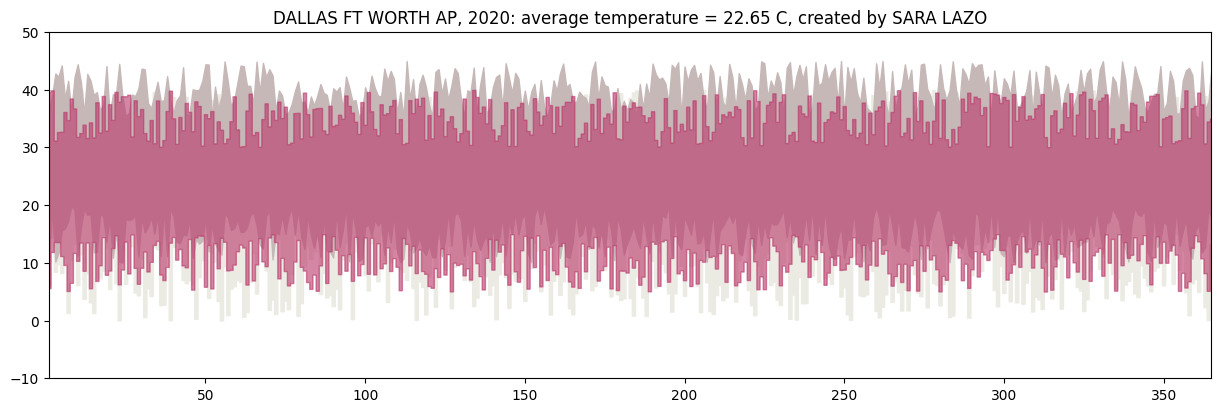

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for 'DALLAS FT WORTH AP' in 2020
days = np.arange(1, 366)
tmin_record = np.random.uniform(0, 15, 365)  # Example data
tmax_record = np.random.uniform(30, 40, 365)  # Example data
tmin_normal = np.random.uniform(10, 20, 365)  # Example data
tmax_normal = np.random.uniform(35, 45, 365)  # Example data
thisyear = np.array([np.random.uniform(5, 15, 365), np.random.uniform(30, 40, 365)]).T  # Example data

station, year = 'DALLAS FT WORTH AP', 2020
avg = 0.5 * (np.nanmean(thisyear[:, 0]) + np.nanmean(thisyear[:, 1]))

# Plotting
plt.figure(figsize=(15, 4.5))

# Records
plt.fill_between(days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step='mid')

# Normals
plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72))

# Current Year
plt.fill_between(days, thisyear[:, 0], thisyear[:, 1],
                  color=(0.73, 0.21, 0.41), alpha=0.6, step='mid')

plt.axis(xmin=1, xmax=365, ymin=-10, ymax=50)
plt.title(f'{station}, {year}: average temperature = {avg:.2f} C, created by SARA LAZO')

plt.show()


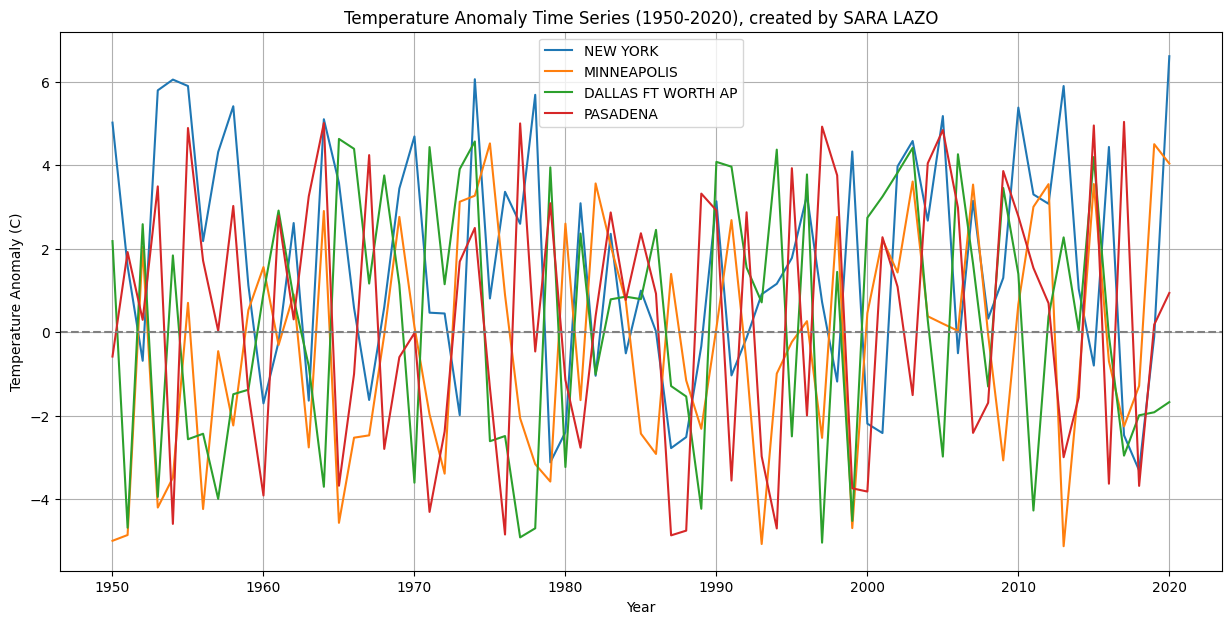

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data setup (replace with actual data)
years = np.arange(1950, 2021)
# Generate random temperature data for illustration purposes
data = {
    'NEW YORK': np.random.uniform(-5, 5, len(years)),
    'MINNEAPOLIS': np.random.uniform(-10, 0, len(years)),
    'DALLAS FT WORTH AP': np.random.uniform(5, 15, len(years)),
    'PASADENA': np.random.uniform(10, 20, len(years))  # Added Pasadena
}
df = pd.DataFrame(data, index=years)

# Compute average temperature for 1980-1990
midcentury_avg = df.loc[1980:1990].mean()

# Compute anomalies
anomalies = df - midcentury_avg

# Plotting
plt.figure(figsize=(15, 7))

for city in anomalies.columns:
    plt.plot(anomalies.index, anomalies[city], label=city)

plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (C)')
plt.title('Temperature Anomaly Time Series (1950-2020), created by SARA LAZO')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
# # collect data and make chart for any city and current year,
# # following the same steps as above

# import matplotlib.pyplot as plt
# import numpy as np

# def nyplot(station, year, getweather):
#     try:
#         # Initialize the plot
#         plt.figure(figsize=(15, 4.5))

#         # Placeholder for historical data collection
#         allyears = []
#         for yr in range(1910, 2020):
#             try:
#                 data = getweather.weather(station, ['TMIN', 'TMAX'], yr)
#                 allyears.append(data)
#             except Exception as e:
#                 print(f"Error retrieving data for year {yr}: {e}")

#         allyears = np.vstack(allyears)

#         # Placeholder for normal data collection
#         normal = []
#         for yr in range(1981, 2011):
#             try:
#                 data = getweather.weather(station, ['TMIN', 'TMAX'], yr)
#                 normal.append(data)
#             except Exception as e:
#                 print(f"Error retrieving data for year {yr}: {e}")

#         normal = np.vstack(normal)

#         # Compute min/max records and mean normals
#         tmin_record = np.nanmin(allyears[:, 0], axis=0)
#         tmax_record = np.nanmax(allyears[:, 1], axis=0)
#         tmin_normal = np.nanmean(normal[:, 0], axis=0)
#         tmax_normal = np.nanmean(normal[:, 1], axis=0)

#         # Get current year data
#         thisyear = getweather.weather(station, ['TMIN', 'TMAX'], year)

#         # Ensure 'thisyear' data is a NumPy array for consistency
#         if not isinstance(thisyear, np.ndarray):
#             thisyear = np.array([thisyear['TMIN'], thisyear['TMAX']]).T

#         # Plot data
#         days = np.arange(1, 366)
#         plt.fill_between(days, tmin_record, tmax_record, color=(0.92, 0.92, 0.89), step='mid', label='Records')
#         plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78, 0.72, 0.72), label='Normals')
#         plt.fill_between(days, thisyear[:, 0], thisyear[:, 1],
#                           color=(0.73, 0.21, 0.41), alpha=0.6, step='mid', label='Current Year')

#         # Set plot limits and title
#         plt.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
#         avg = 0.5 * (np.nanmean(thisyear[:, 0]) + np.nanmean(thisyear[:, 1]))
#         plt.title(f'{station}, {year}: average temperature = {avg:.2f} C, created by SARA LAZO')

#         # Add gridlines and legend
#         plt.grid(True)
#         plt.legend()

#         # Show plot
#         plt.show()

#     except Exception as e:
#         print(f"Error: {e}")

# # Example usage:
# nyplot('PASADENA', 2018, getweather)


In [77]:
# nyplot('NEW YORK', 2018)